In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
sample_submission = pd.read_csv("./data/sample_submit.csv", header=None)

In [3]:
train_X, train_y = train_data.iloc[:, :-1], train_data.iloc[:, -1]
test_X = test_data

In [4]:
#train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.1, random_state=42)

3


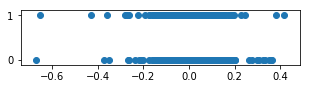

4


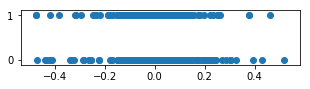

5


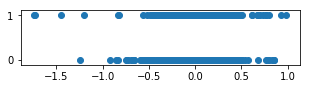

6


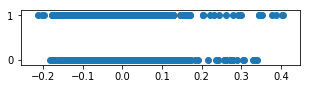

7


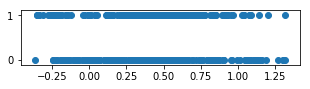

8


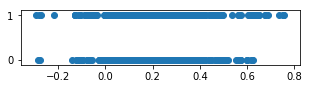

9


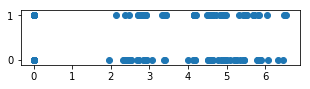

10


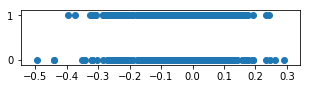

11


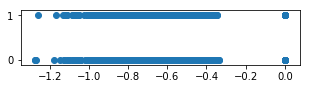

12


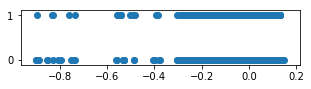

13


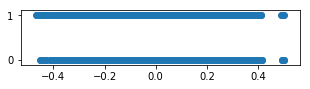

14


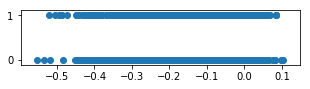

15


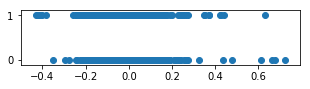

16


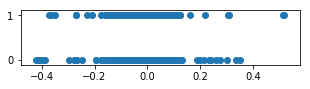

17


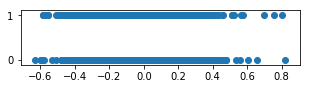

18


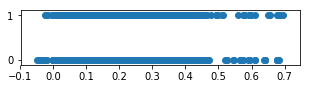

19


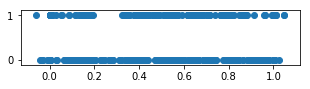

20


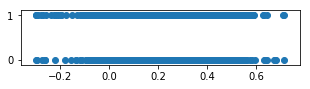

21


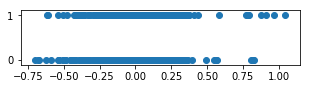

22


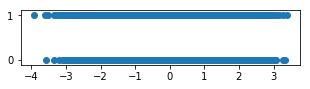

23


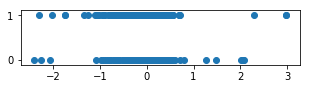

24


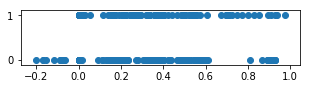

25


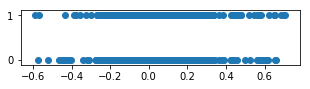

26


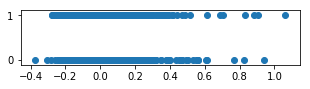

27


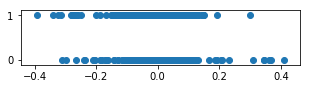

28


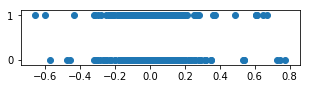

29


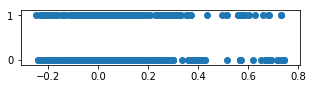

30


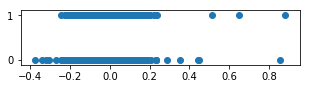

31


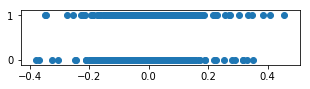

32


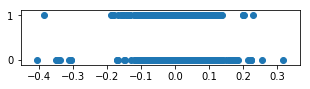

33


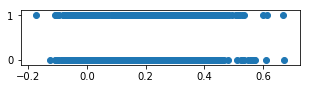

34


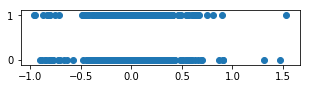

35


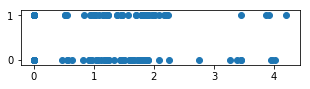

36


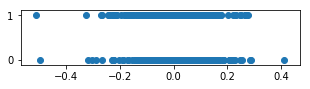

37


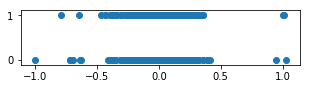

38


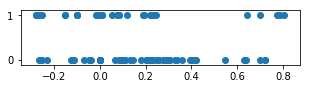

39


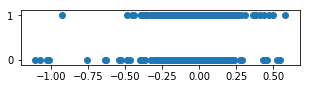

40


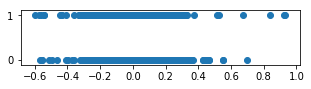

41


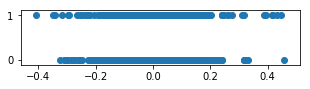

42


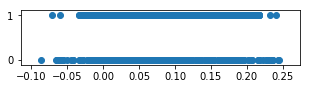

43


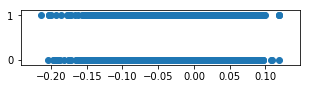

44


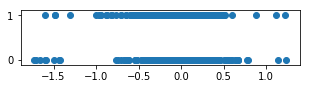

45


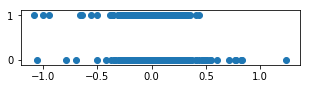

46


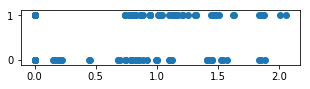

47


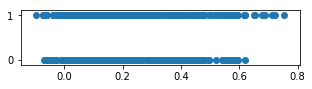

48


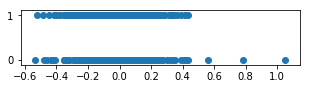

49


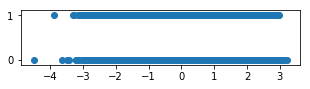

50


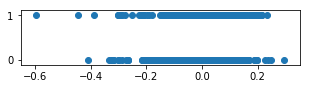

51


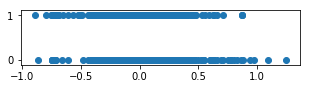

52


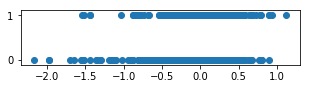

53


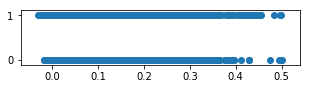

54


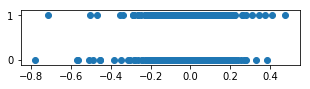

55


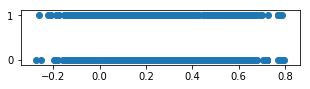

56


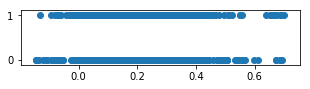

57


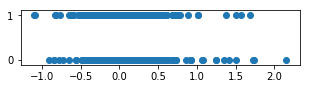

58


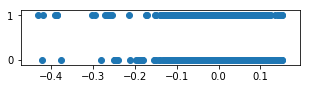

59


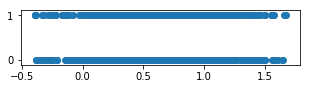

60


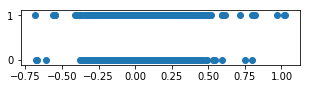

61


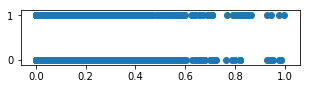

62


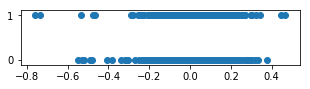

63


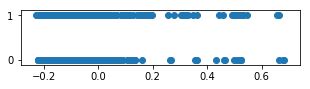

64


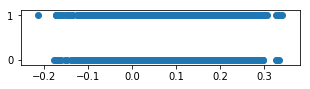

65


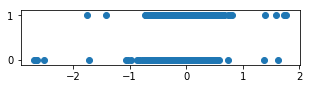

66


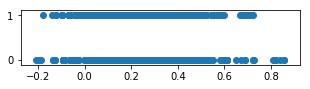

67


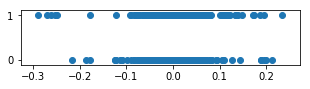

68


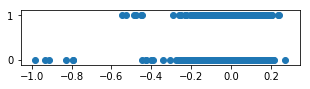

69


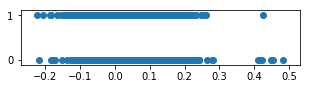

70


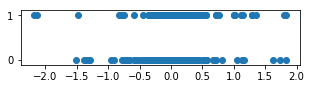

71


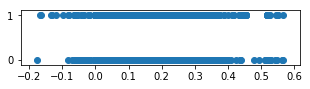

72


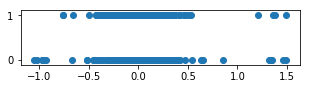

73


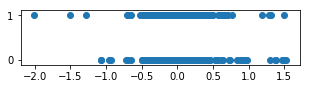

74


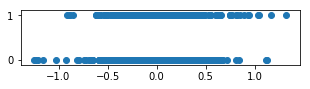

75


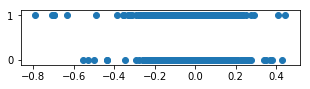

76


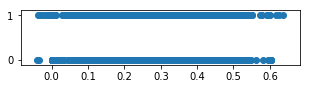

77


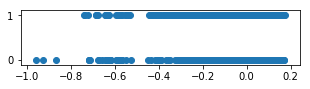

78


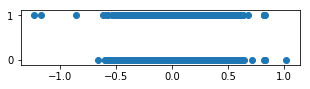

79


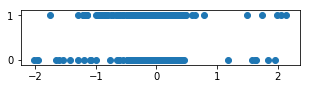

80


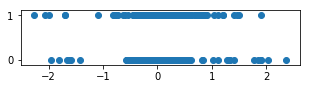

81


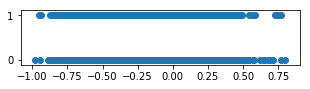

82


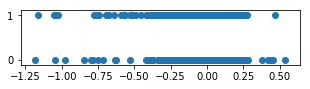

83


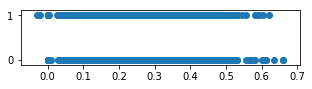

84


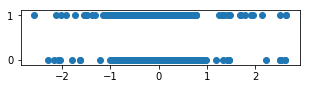

85


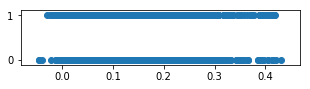

86


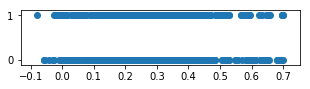

87


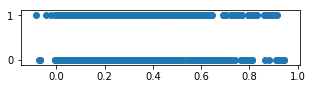

88


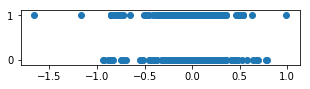

89


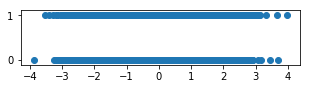

90


IndexError: single positional indexer is out-of-bounds

In [80]:
for i in range(3, 100):
    plt.figure(figsize=(5, 1))
    print i
    plt.scatter(valid_X.iloc[:, i], valid_y)
    plt.show()

In [4]:
RF = xgb.XGBClassifier()
RF.fit(train_X.iloc[:, 2:], train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

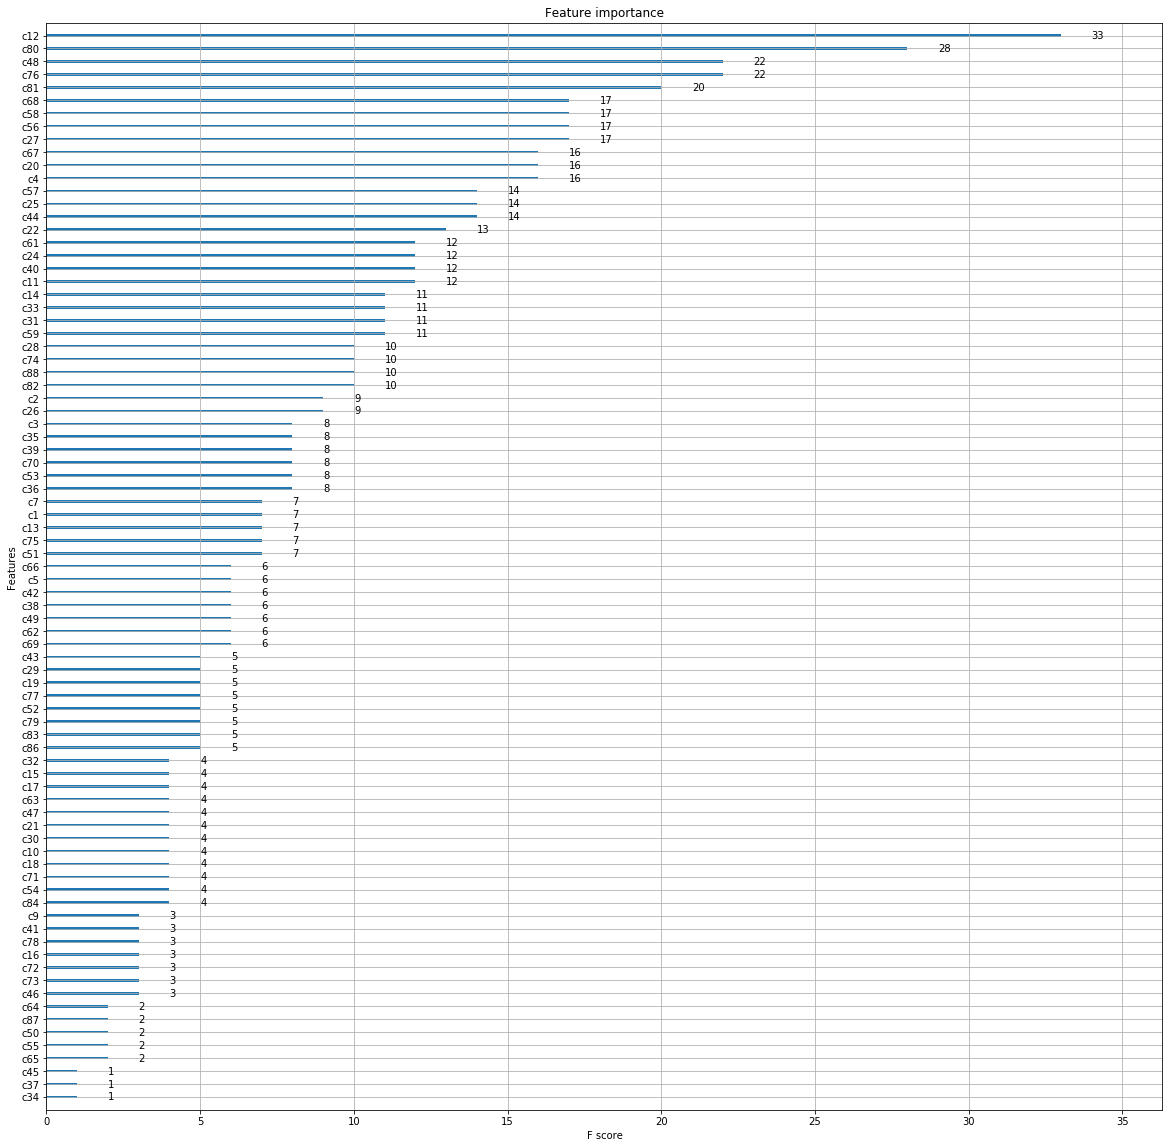

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(RF, ax=ax)
plt.show()

In [5]:
mask = (train_X["period"] == "train9") | (train_X["period"] == "train6") | (train_X["period"] == "train4") | (train_X["period"] == "train7") | \
(train_X["period"] == "train5") | (train_X["period"] == "train3") | (train_X["period"] == "train1") | (train_X["period"] == "train14") | \
(train_X["period"] == "train13") | (train_X["period"] == "train11") | (train_X["period"] == "train10") | (train_X["period"] == "train2") | \
(train_X["period"] == "train12")
train_X = train_X[mask]
train_y = train_y[mask]

In [6]:
len(train_data)

560000

In [7]:
len(train_X)

520000

In [8]:
feature_select = ["c12", "c80", "c48", "c76"] #
feature_select = ["c12", "c80", "c48", "c76", "c81"] #0.69260
#feature_select = ["c12", "c80", "c48", "c76", "c81", "c68", "c58", "c56", "c27", "c67"]　# 0.69472
train_X_select = train_X[feature_select]
train_X_select["bias"] = 1

w = np.linalg.inv(train_X_select.T.dot(train_X_select)).dot(train_X_select.T).dot(train_y)
test_X_select = test_X[feature_select]
test_X_select["bias"] = 1

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


validで評価

In [18]:
print classification_report(valid_y, pred_y)
print log_loss(y_pred=pred_y, y_true=valid_y) 
print confusion_matrix(valid_y, pred_y)

             precision    recall  f1-score   support

          0       0.59      0.50      0.54     28046
          1       0.56      0.65      0.60     27954

avg / total       0.57      0.57      0.57     56000

14.7507265458
[[13901 14145]
 [ 9771 18183]]


提出用

In [9]:
sample_submission[1] = w.dot(test_X_select.T)
sample_submission.to_csv("result.csv", index=0)

In [8]:
test_y = RF.predict_proba(test_X.iloc[:, 1:])
sample_submission[1] = test_y[:, 1]
sample_submission.to_csv("result.csv", index=0)